
# Assignment 2 - Decision Tree Modeling & Analysis

## First Task: 
Load the dataset csv with pandas as a dataframe and print the basic summary of the data

In [24]:
import pandas as pd

# Load the dataset
file_path = 'dataset/credit-score-germany.csv'
df = pd.read_csv(file_path)

# Print the basic summary of the data
summary = df.describe(include='all')
summary.T # Transpose for better readability

,count,mean,std,min,25%,50%,75%,max
X1,1000.0,2.577,1.257638,1.0,1.0,2.0,4.0,4.0
X2,1000.0,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
X3,1000.0,2.545,1.083120,0.0,2.0,2.0,4.0,4.0
X4,1000.0,32.711,28.252605,2.0,14.0,23.0,40.0,184.0
X5,1000.0,2.105,1.580023,1.0,1.0,1.0,3.0,5.0
X6,1000.0,3.384,1.208306,1.0,3.0,3.0,5.0,5.0
X7,1000.0,2.682,0.708080,1.0,2.0,3.0,3.0,4.0
X8,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
X9,1000.0,2.358,1.050209,1.0,1.0,2.0,3.0,4.0
X10,1000.0,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


## Second Task
Visualize the data and create: a pairplot with pairwise feature scatterplots and feature histograms

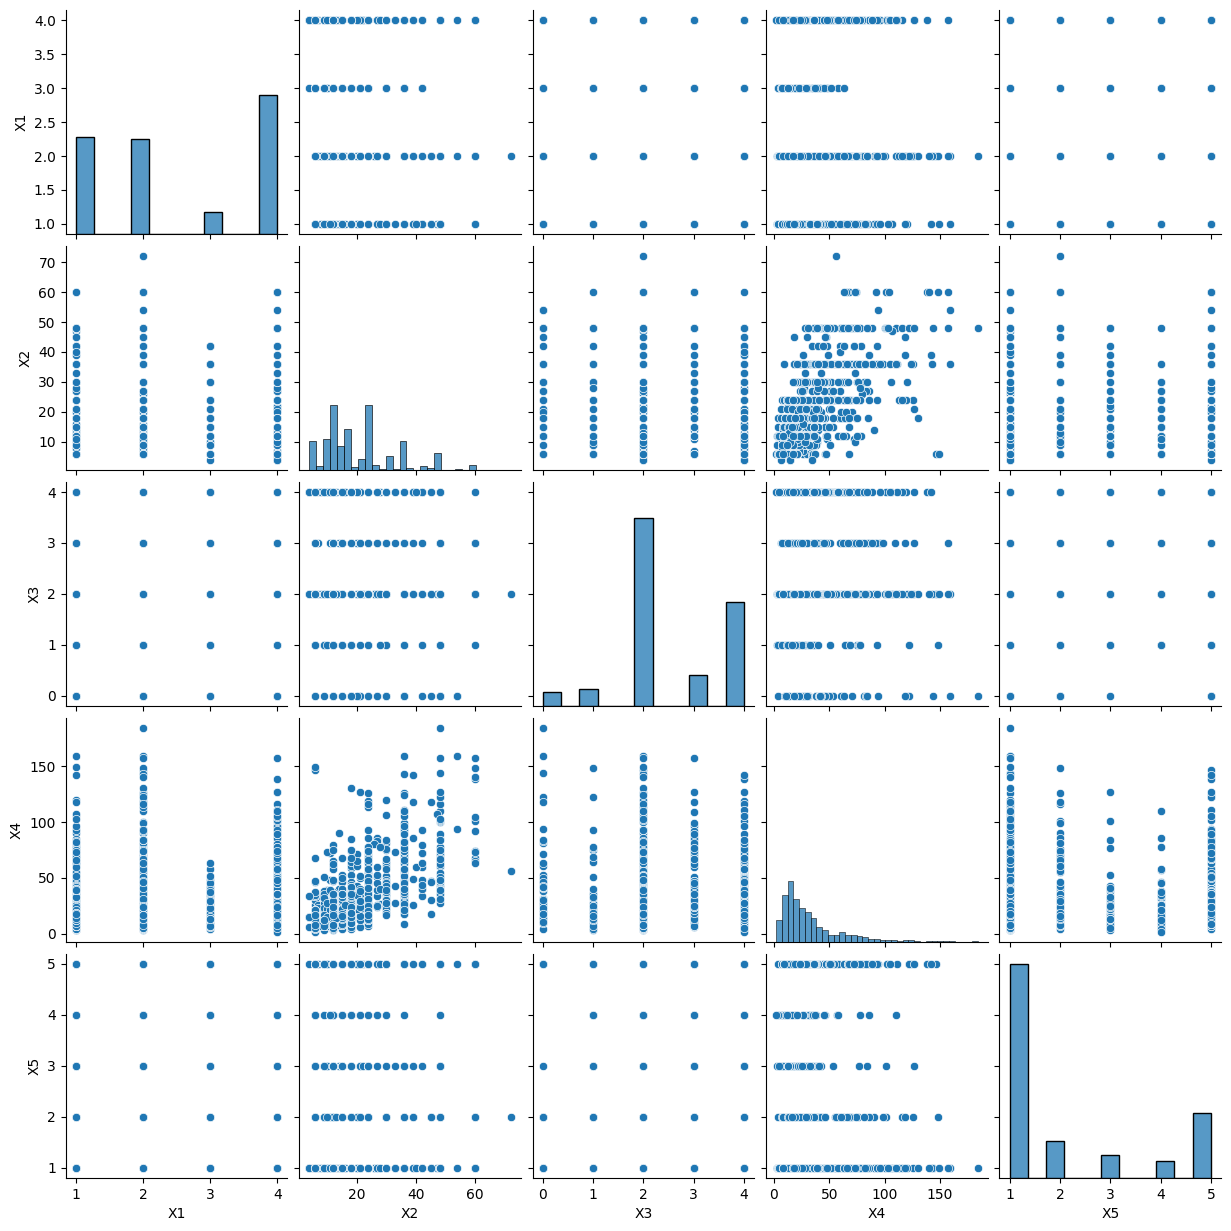

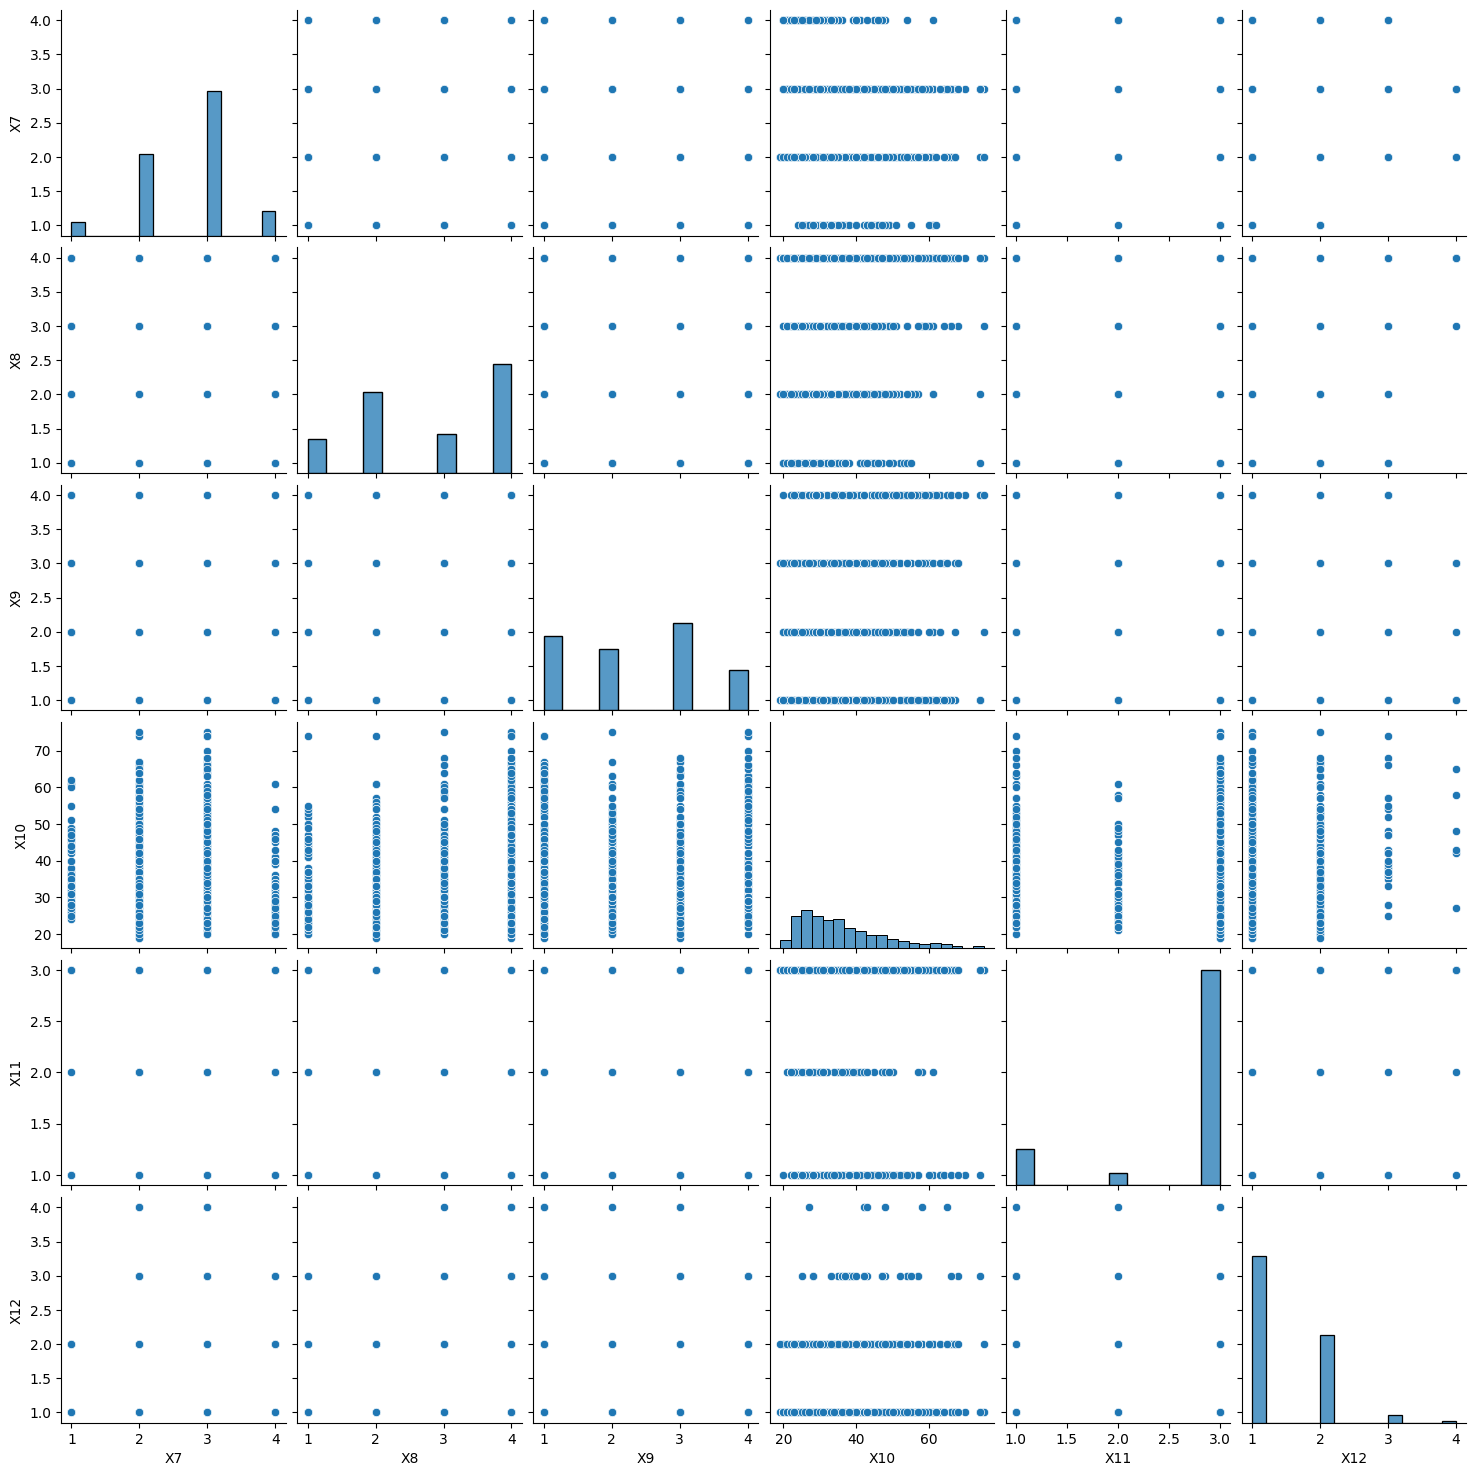

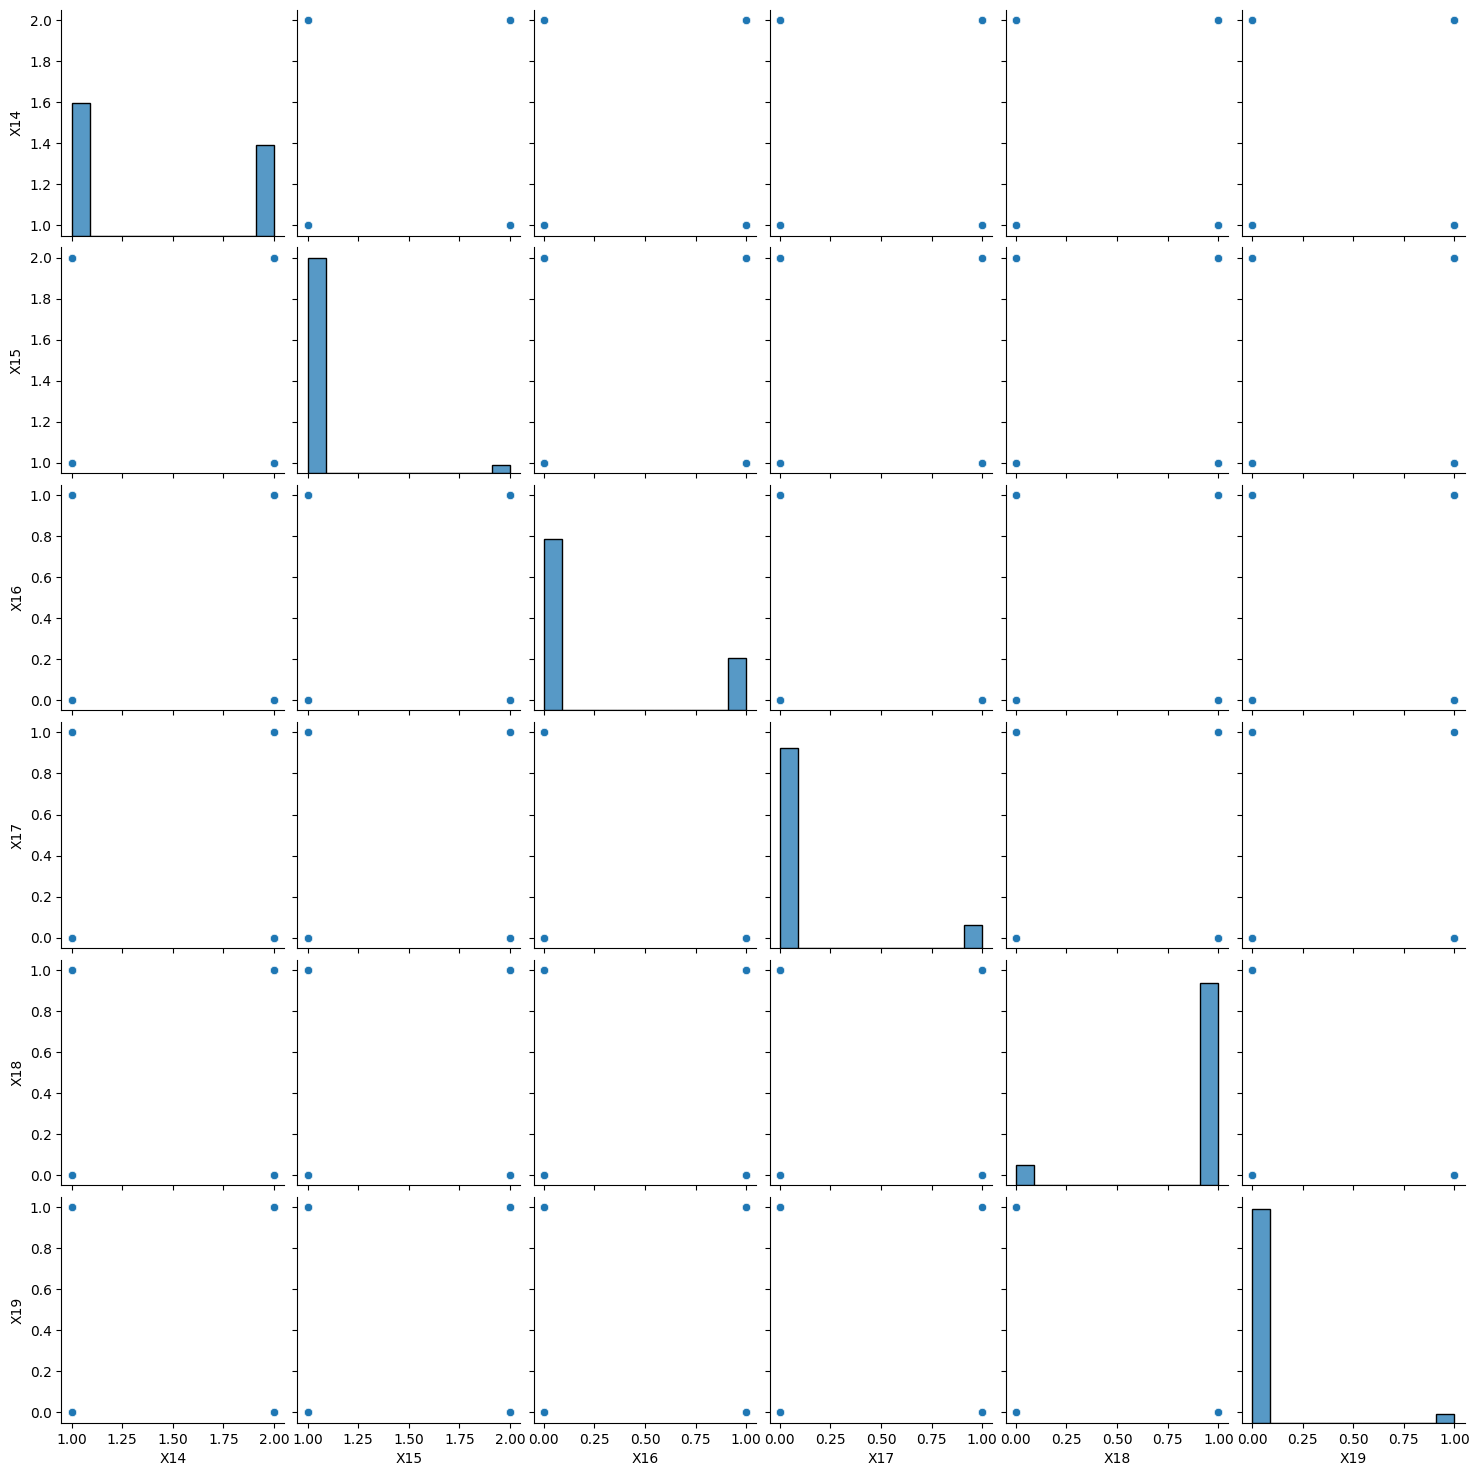

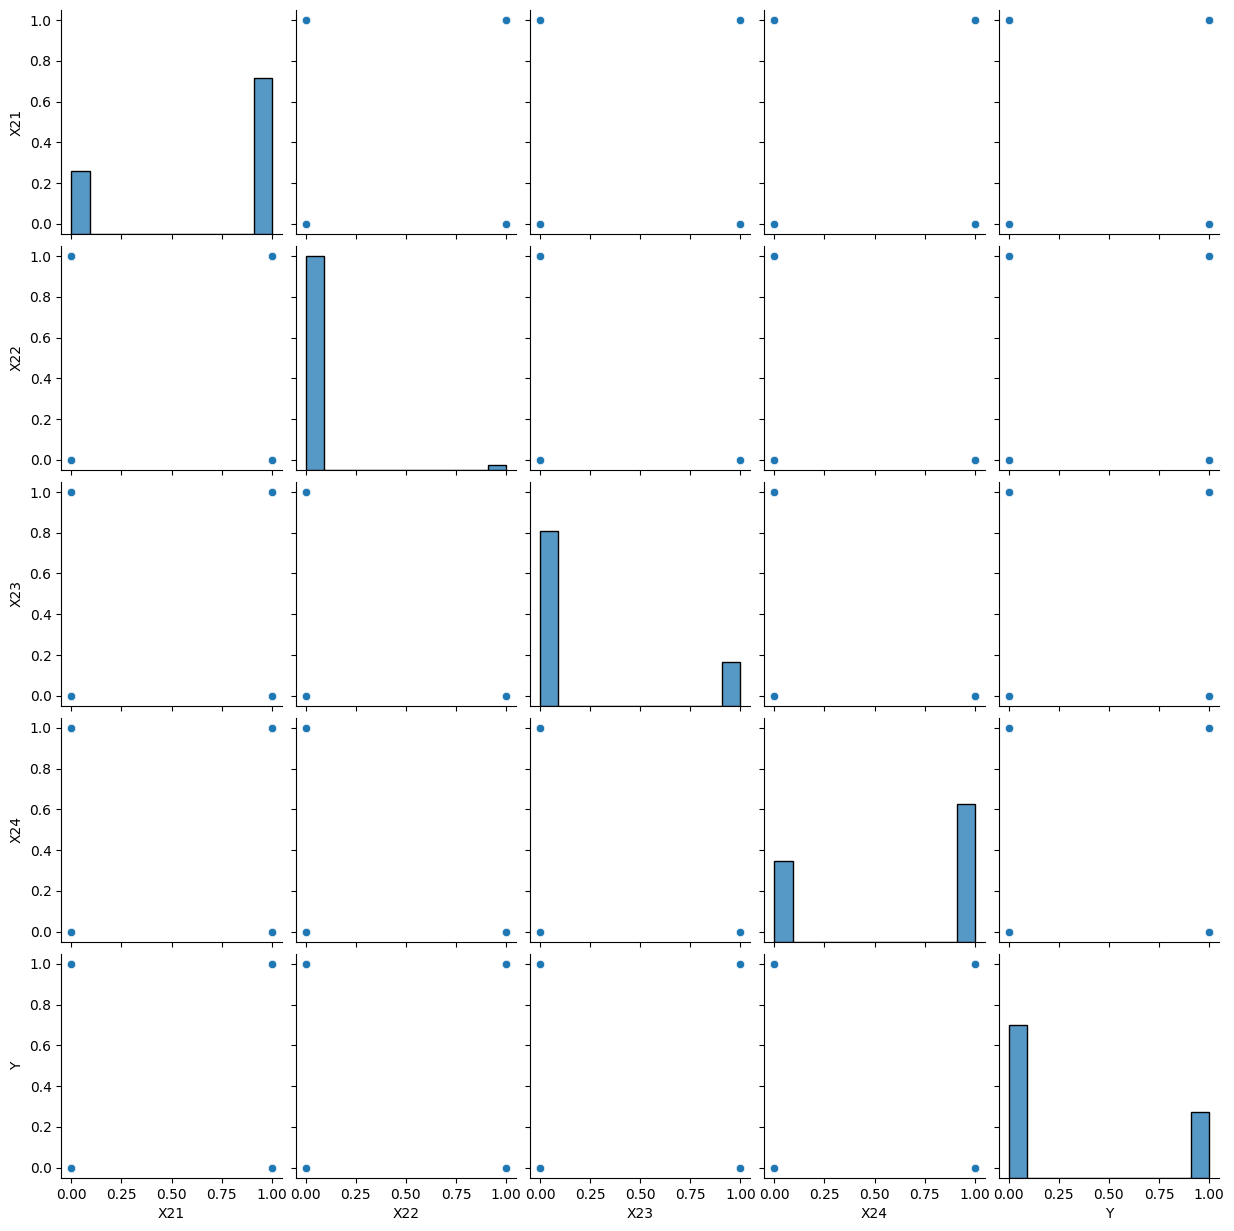

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for the pairplot to avoid overloading the plot
selected_columns1 = df.columns[:5]
selected_columns2 = df.columns[6:12]
selected_columns3 = df.columns[13:19]
selected_columns4 = df.columns[20:25]

# Create a pairplots
sns.pairplot(df[selected_columns1])
sns.pairplot(df[selected_columns2])
sns.pairplot(df[selected_columns3])
sns.pairplot(df[selected_columns4])

# Show the plots
plt.show()


## Third Task:
Using only the _first five features_ and the _first twenty data points_, build a decision tree using the _naive_ method. Apply pruning as necessary on the obtained tree.

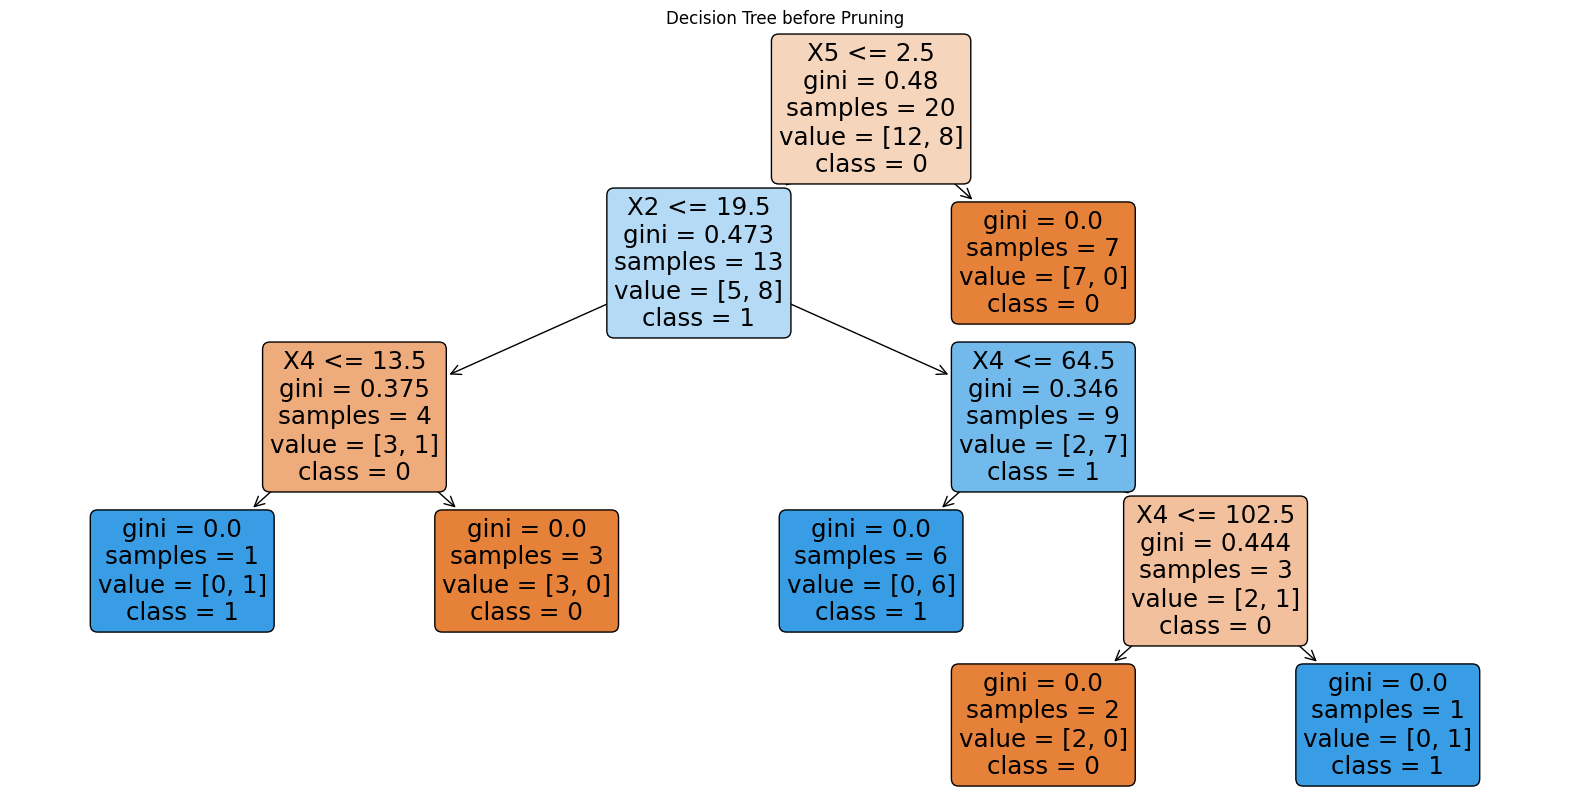

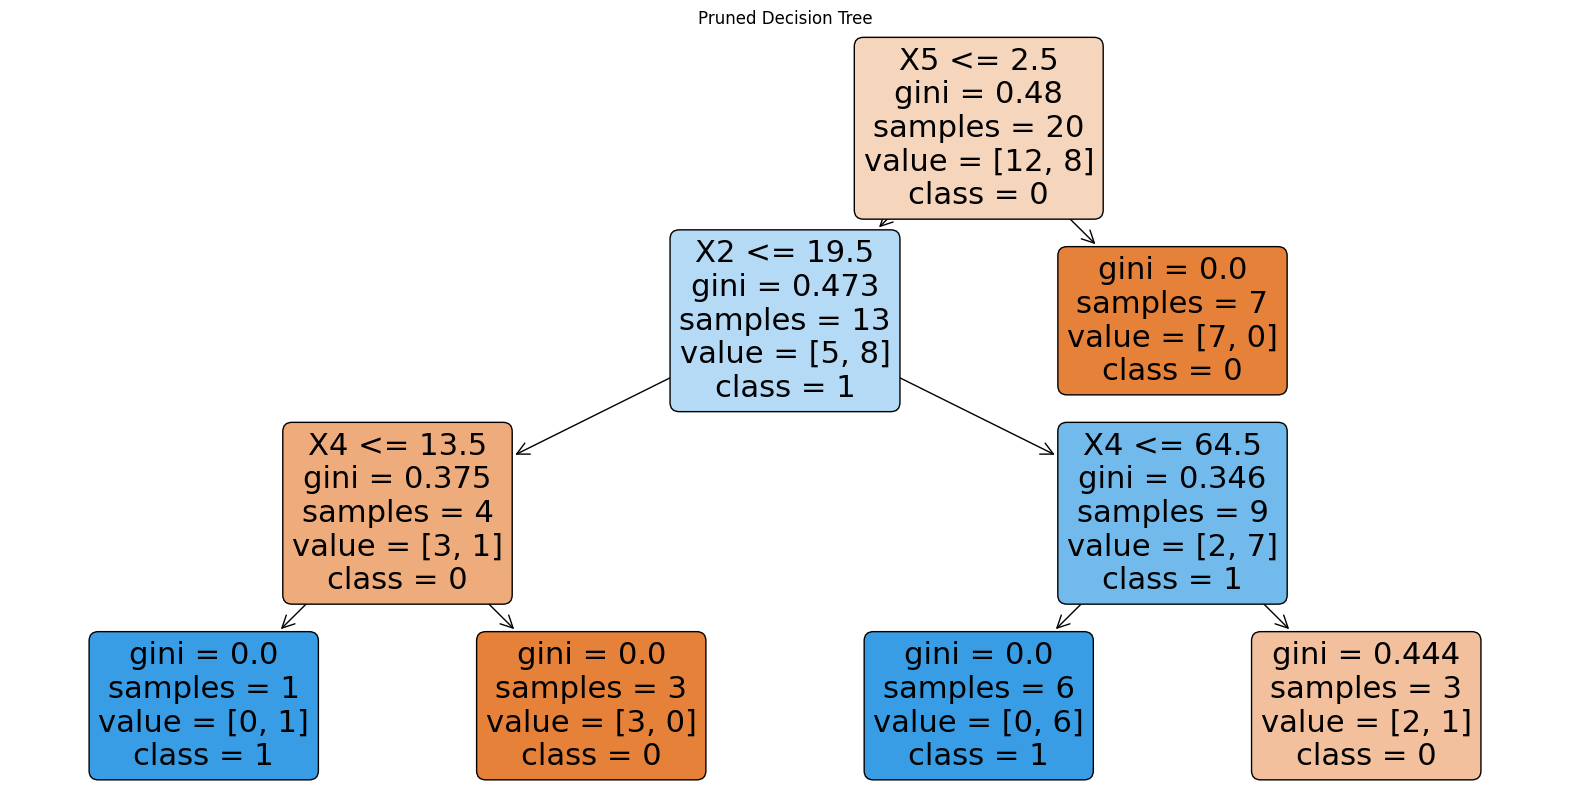

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Selecting the first five features and first twenty data points
X = df.iloc[:20, :5]
y = df.iloc[:20, -1]

# Building a decision tree using the naive method
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X, y)

# Plotting the decision tree before pruning
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=["0", "1"], rounded=True)
plt.title("Decision Tree before Pruning")
plt.show()

# Pruning the tree
# The most naive approach would be to limit the depth of the tree
pruned_dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
pruned_dt_clf.fit(X, y)

# Plotting the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_dt_clf, filled=True, feature_names=X.columns, class_names=["0", "1"], rounded=True)
plt.title("Pruned Decision Tree")
plt.show()

## Fourth Task:
Using only the _first five features_ and the _first twenty data points_, calculate the information gain of each feature according to entropy. What feature is the "best" feature?

In [48]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Calculate the information gain for each feature standard tree
feature_importances = dt_clf.feature_importances_
feature_names = X.columns
information_gain = pd.DataFrame(feature_importances, index=feature_names, columns=["Information Gain"])
information_gain.sort_values(by="Information Gain", ascending=False, inplace=True)

# Identify the best feature
best_feature = information_gain.idxmax().values[0]
best_feature_gain = information_gain.max().values[0]

# Calculate the information gain for each feature of the pruned tree
feature_importances = pruned_dt_clf.feature_importances_
feature_names = X.columns
information_gain_pruned = pd.DataFrame(feature_importances, index=feature_names, columns=["Information Gain Pruned Tree"])
information_gain_pruned.sort_values(by="Information Gain Pruned Tree", ascending=False, inplace=True)

# Identify the best feature
best_feature_pruned = information_gain_pruned.idxmax().values[0]
best_feature_gain_pruned = information_gain_pruned.max().values[0]

information_gain, best_feature, best_feature_gain, information_gain_pruned, best_feature_pruned, best_feature_gain_pruned

(    Information Gain
 X4          0.643497
 X5          0.356503
 X1          0.000000
 X2          0.000000
 X3          0.000000,
 'X4',
 0.643496998341907,
     Information Gain Pruned Tree
 X5                      0.416873
 X4                      0.396505
 X2                      0.186621
 X1                      0.000000
 X3                      0.000000,
 'X5',
 0.4168734491315137)

## Fifth Task:
Model the entire dataset using a decision tree classifier performing the following tasks:
1. split the dataset into a train and test partition using 20% of the data for training
2. train the classifier on the train partition and then compute accuracy scores for training and test
3. repeat the modeling step a few times and report average training and test accuracy. explain the relationship between the two values.


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

# Split the data into features and target
X_full = df.iloc[:, :-1]  # all features except the last column
y_full = df.iloc[:, -1]   # the last column is the target

# Initializing variables to store accuracies
train_accuracies = []
test_accuracies = []

# Repeat the modeling a few times (e.g., 5 times)
for _ in range(20):
    # Generate a different random state for each iteration
    random_state = random.randint(0, 1000)

    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.20, random_state=random_state)

    # Create and train the decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)

    # Compute accuracy on the training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Compute accuracy on the test set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Prepare a formatted string for displaying both train and test accuracies, and calculate the mean for both
accuracies_str = "\n".join([
    f"Run {i+1}: Train Accuracy = {train_acc:.2f}, Test Accuracy = {test_acc:.2f}" 
    for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies))
])

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

# Combine the accuracies and the means into one string for printing
final_output = f"{accuracies_str}\n\nMean Train Accuracy: {avg_train_accuracy:.2f}\nMean Test Accuracy: {avg_test_accuracy:.2f}"

print(final_output)

Run 1: Train Accuracy = 1.00, Test Accuracy = 0.71
Run 2: Train Accuracy = 1.00, Test Accuracy = 0.73
Run 3: Train Accuracy = 1.00, Test Accuracy = 0.65
Run 4: Train Accuracy = 1.00, Test Accuracy = 0.72
Run 5: Train Accuracy = 1.00, Test Accuracy = 0.71
Run 6: Train Accuracy = 1.00, Test Accuracy = 0.72
Run 7: Train Accuracy = 1.00, Test Accuracy = 0.68
Run 8: Train Accuracy = 1.00, Test Accuracy = 0.63
Run 9: Train Accuracy = 1.00, Test Accuracy = 0.70
Run 10: Train Accuracy = 1.00, Test Accuracy = 0.74
Run 11: Train Accuracy = 1.00, Test Accuracy = 0.65
Run 12: Train Accuracy = 1.00, Test Accuracy = 0.68
Run 13: Train Accuracy = 1.00, Test Accuracy = 0.66
Run 14: Train Accuracy = 1.00, Test Accuracy = 0.64
Run 15: Train Accuracy = 1.00, Test Accuracy = 0.71
Run 16: Train Accuracy = 1.00, Test Accuracy = 0.67
Run 17: Train Accuracy = 1.00, Test Accuracy = 0.70
Run 18: Train Accuracy = 1.00, Test Accuracy = 0.68
Run 19: Train Accuracy = 1.00, Test Accuracy = 0.66
Run 20: Train Accurac

## Sixth Task:
Vary the maximum allowed depth for the decision tree from 2 to 20 (inclusive) and repeat the modeling at step 5. Create a plot showing the evolution of train/test accuracy with tree depth. Investigate if overfitting occurs as you increase the decision tree depth and identify the depth value that prevents overfitting.

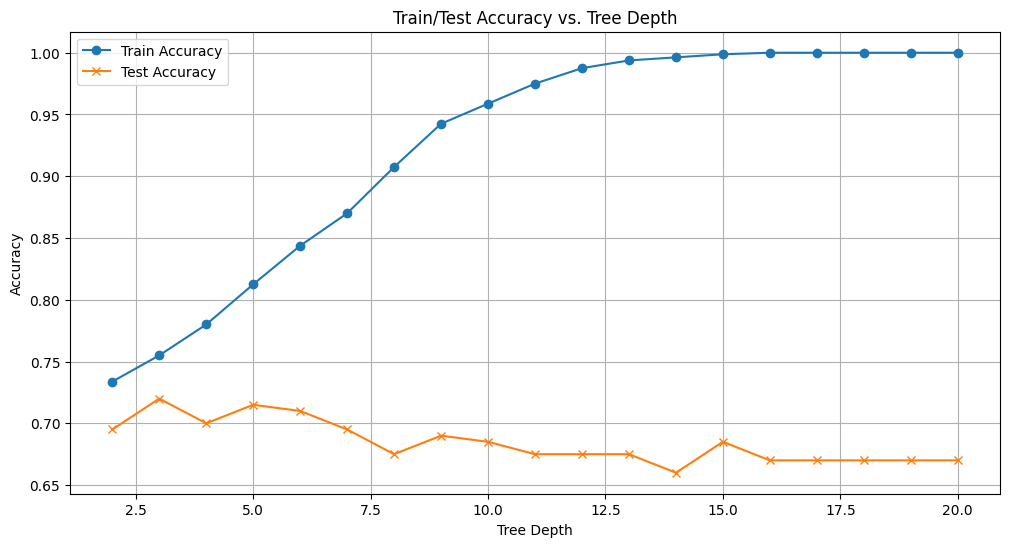

In [65]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Initialize lists to store accuracies for different tree depths
depths = range(2, 21)  # Tree depths from 2 to 20
train_accuracies_depth = []
test_accuracies_depth = []

# Repeat the modeling for each depth
for depth in depths:
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=0)

    # Create and train the decision tree classifier with the specified depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    # Compute accuracy on the training set
    y_train_pred = clf.predict(X_train)
    train_accuracy_depth = accuracy_score(y_train, y_train_pred)
    train_accuracies_depth.append(train_accuracy_depth)

    # Compute accuracy on the test set
    y_test_pred = clf.predict(X_test)
    test_accuracy_depth = accuracy_score(y_test, y_test_pred)
    test_accuracies_depth.append(test_accuracy_depth)

# Plotting the accuracies against tree depth
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies_depth, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies_depth, label='Test Accuracy', marker='x')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()
